In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
data.shape

(499, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     499 non-null    int64  
 1   dteday      499 non-null    object 
 2   season      499 non-null    int64  
 3   yr          499 non-null    int64  
 4   mnth        499 non-null    int64  
 5   holiday     499 non-null    int64  
 6   weekday     499 non-null    int64  
 7   workingday  499 non-null    int64  
 8   weathersit  499 non-null    int64  
 9   temp        499 non-null    float64
 10  atemp       499 non-null    float64
 11  hum         499 non-null    float64
 12  windspeed   499 non-null    float64
 13  casual      499 non-null    int64  
 14  registered  499 non-null    int64  
 15  cnt         499 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 62.5+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,2.206413,0.268537,5.515030,0.028056,2.995992,0.683367,1.408818,18.979325,22.316516,62.601307,13.212513,706.577154,3030.551102,3737.128257
std,144.193157,1.095573,0.443643,3.459066,0.165299,2.009012,0.465630,0.557175,7.350670,8.038017,15.282889,5.278390,612.099032,1194.650805,1538.501032
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,9.000000,416.000000,431.000000
25%,125.500000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.998189,15.843550,50.666050,9.313000,226.500000,2111.500000,2463.000000
50%,250.000000,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,18.518347,22.222300,62.666700,12.707689,603.000000,3176.000000,3926.000000
75%,374.500000,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,25.215000,28.725925,73.791650,16.083618,900.000000,3845.500000,4761.500000
max,499.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,42.044800,97.250000,34.000021,3252.000000,5950.000000,8362.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021154B849A0>,
      dtype=object)

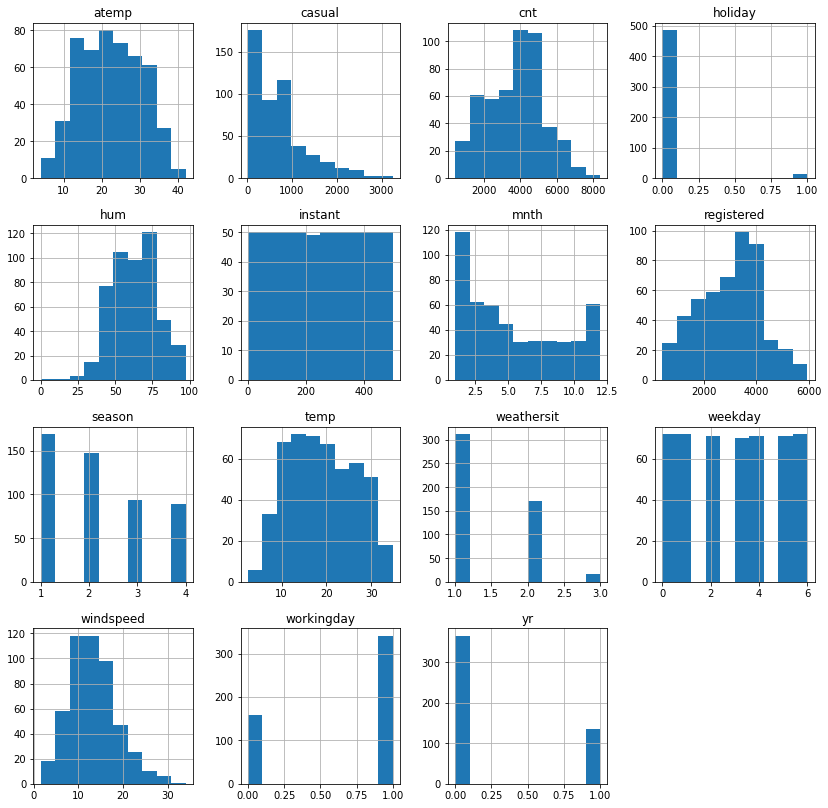

In [7]:
data.hist(figsize=(14,14))

All weekdays's contribution for shared bike demand are almost same but in weekend day demand is more than.

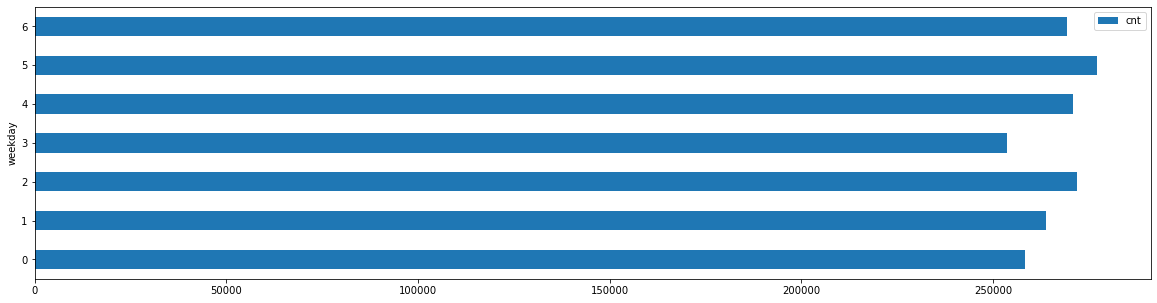

In [8]:
data[['weekday', 'cnt']].groupby(['weekday']).sum().plot(kind='barh', figsize=(20, 5))

Highest contribution for shared bike demand in clear weather.

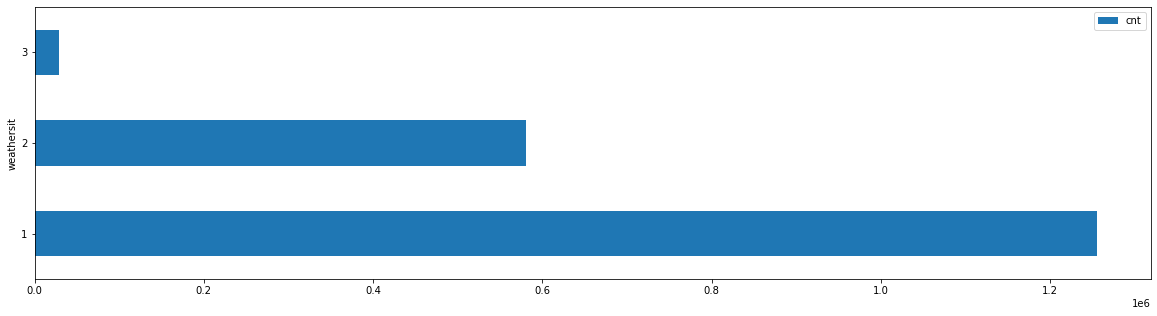

In [9]:
data[['weathersit', 'cnt']].groupby(['weathersit']).sum().plot(kind='barh', figsize=(20, 5))

In [10]:
corr=data.corr()
corr["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.930240
casual        0.697908
atemp         0.629020
temp          0.617873
instant       0.537315
yr            0.355828
season        0.283648
mnth          0.193226
workingday    0.053859
weekday       0.043256
holiday      -0.067509
hum          -0.091001
windspeed    -0.184454
weathersit   -0.293301
Name: cnt, dtype: float64

In [11]:
corrmat=data.corr()
corrmat

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.137967,0.767644,0.187995,0.014996,-0.000049,-0.004666,-0.023169,0.034553,0.048313,-0.017807,-0.032241,0.189794,0.594723,0.537315
season,0.137967,1.000000,-0.440651,0.865255,-0.009866,-0.001448,0.010286,0.048987,0.443957,0.447903,0.262581,-0.226985,0.212756,0.256280,0.283648
yr,0.767644,-0.440651,1.000000,-0.482860,0.006585,-0.010055,-0.005552,-0.038843,-0.218894,-0.210723,-0.190814,0.121607,0.078743,0.417900,0.355828
mnth,0.187995,0.865255,-0.482860,1.000000,0.009797,0.015901,0.002961,0.029104,0.383480,0.390125,0.264647,-0.232266,0.143103,0.175519,0.193226
holiday,0.014996,-0.009866,0.006585,0.009797,1.000000,-0.102455,-0.249598,-0.037576,-0.028749,-0.038892,-0.049892,0.035696,0.040028,-0.107448,-0.067509
weekday,-0.000049,-0.001448,-0.010055,0.015901,-0.102455,1.000000,0.035133,0.058871,-0.012603,-0.012535,-0.027003,0.016162,0.026341,0.042210,0.043256
workingday,-0.004666,0.010286,-0.005552,0.002961,-0.249598,0.035133,1.000000,0.058771,0.058716,0.063088,0.026035,-0.009758,-0.502092,0.326616,0.053859
weathersit,-0.023169,0.048987,-0.038843,0.029104,-0.037576,0.058871,0.058771,1.000000,-0.070571,-0.072851,0.584478,0.026112,-0.216683,-0.266699,-0.293301
temp,0.034553,0.443957,-0.218894,0.383480,-0.028749,-0.012603,0.058716,-0.070571,1.000000,0.996325,0.184930,-0.132151,0.527648,0.525363,0.617873
atemp,0.048313,0.447903,-0.210723,0.390125,-0.038892,-0.012535,0.063088,-0.072851,0.996325,1.000000,0.195306,-0.157681,0.531608,0.537689,0.629020


In [12]:
data.drop(['dteday'], axis = 1, inplace=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
x=data.drop(["cnt"],axis=1).values
y=data["cnt"].values

In [14]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [15]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=regressor.predict(x_test)
y_pred

array([ 981., 4334., 3267., 2429.,  986., 1360., 6370., 4985., 5511.,
       3348., 5026., 4068., 5342.,  985., 4575., 4661., 2169., 5515.,
        431., 2227., 1891., 4826., 5130., 3523., 2710., 5585., 3368.,
       3598., 6296., 3830., 4648., 4058., 3542., 5362., 1421., 4862.,
       3272., 3239., 4595., 4105., 6273., 4433., 4153., 4509., 3068.,
       5698., 3387., 2134., 1685., 3409., 1985., 6304., 4484., 2192.,
       4378., 4098., 4390., 2432., 2423., 4367., 4881., 2376., 3331.,
       4401., 1301., 4458., 4844., 3487., 2455., 5298., 3190., 4845.,
       4189., 5936., 4833., 4339., 3663., 3767., 4773., 4649., 4294.,
       3422., 3249., 4835., 1472., 4792., 3784., 3577., 4602., 4187.,
       2914., 6235., 4362., 3659., 4758., 5058., 4660., 1562., 6398.,
       1746.])

In [17]:
r2_score(y_test,y_pred)

1.0

In [18]:
mean_squared_error(y_test, y_pred)

1.0733960917582648e-24

Test the model on test file

In [19]:
test_x=pd.read_csv("test.csv")
test_x.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,501,16-05-2019,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433
1,502,17-05-2019,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142
2,503,18-05-2019,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118
3,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
4,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425


In [20]:
test_x.drop(['dteday'], axis = 1, inplace=True)
test_x.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,501,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433
1,502,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142
2,503,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118
3,504,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
4,505,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425


In [21]:
test_y_pred=regressor.predict(test_x)
test_y_pred

array([7424., 7384., 7639., 8294., 7129., 4359., 6073., 5260., 6770.,
       6734., 6536., 6591., 6043., 5743., 6855., 7338., 4127., 8120.,
       7641., 6998., 7001., 7055., 7494., 7736., 7498., 6598., 6664.,
       4972., 7421., 7363., 7665., 7702., 6978., 5099., 6825., 6211.,
       5905., 5823., 7458., 6891., 6779., 7442., 7335., 6879., 5463.,
       5687., 5531., 6227., 6660., 7403., 6241., 6207., 4840., 4672.,
       6569., 6290., 7264., 7446., 7499., 6969., 6031., 6830., 6786.,
       5713., 6591., 5870., 4459., 7410., 6966., 7592., 8173., 6861.,
       6904., 6685., 6597., 7105., 7216., 7580., 7261., 7175., 6824.,
       5464., 7013., 7273., 7534., 7286., 5786., 6299., 6544., 6883.,
       6784., 7347., 7605., 7148., 7865., 4549., 6530., 7006., 7375.,
       7765., 7582., 6053., 5255., 6917., 7040., 7697., 7713., 7350.,
       6140., 5810., 6034., 6864., 7112., 6203., 7504., 5976., 8227.,
       7525., 7767., 7870., 7804., 8009., 8714., 7333., 6869., 4073.,
       7591., 7720.,